In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


Label: 0


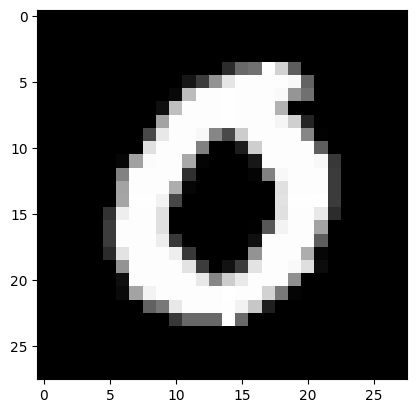

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [7]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


In [8]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [10]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6385 - accuracy: 0.8428 - val_loss: 0.3561 - val_accuracy: 0.9024
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3347 - accuracy: 0.9062 - val_loss: 0.2937 - val_accuracy: 0.9180
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2871 - accuracy: 0.9197 - val_loss: 0.2594 - val_accuracy: 0.9260
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2573 - accuracy: 0.9277 - val_loss: 0.2404 - val_accuracy: 0.9320
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2350 - accuracy: 0.9343 - val_loss: 0.2215 - val_accuracy: 0.9359
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2170 - accuracy: 0.9393 - val_loss: 0.2068 - val_accuracy: 0.9394
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2016 - accuracy: 0.9438 - val_loss: 0.1940 - val_accuracy:

In [11]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 2s 809us/step - loss: 0.1607 - accuracy: 0.9546


[0.16070859134197235, 0.9545833468437195]

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 797us/step - loss: 0.1643 - accuracy: 0.9521


[0.1642693281173706, 0.9520999789237976]